In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def load_summary(snap_name, boxsize=75000.0):
    dtype=[('fofid','i8'),
           ('mfof', 'f8'),
           ('x', 'f8'),
           ('y', 'f8'), 
           ('z', 'f8'),
           ('vx', 'f8'),
           ('vy', 'f8'),
           ('vz', 'f8')]
    snap_data = np.loadtxt(snap_name, dtype=dtype)    
    return snap_data

In [ ]:
data_dm_A = load_summary('../data/dm_selected/summary_halo_A.txt')
data_dm_B = load_summary('../data/dm_selected/summary_halo_B.txt')
data_mstar_A = load_summary('../data/mstar_selected/summary_halo_A.txt')
data_mstar_B = load_summary('../data/mstar_selected/summary_halo_B.txt')

In [ ]:
def norm_pos(data_A):
    d = 0.0
    for c in ['x', 'y', 'z']:
        d += data_A[c]**2
    return np.sqrt(d)

In [ ]:
def separation(data_A, data_B):
    d = 0.0
    for c in ['x', 'y', 'z']:
        d += (data_A[c] - data_B[c])**2
    d = np.sqrt(d)
    return d

In [ ]:
def vel_diff(data_A, data_B):
    d = 0.0
    for c in ['x', 'y', 'z']:
        d += (data_A['v'+c] - data_B['v'+c])**2
    d = np.sqrt(d)
    return d

In [7]:
def vel_radial(data_A, data_B):
    d = 0.0
    dd = separation(data_A, data_B) 
    for c in ['x', 'y', 'z']:
        d += (data_B['v'+c] - data_A['v'+c])*(data_B[c] - data_A[c])/dd
        # this term corresponds to the Hubble Flow
        d += (data_B[c] - data_A[c]) * 100.0/1000.0
    return d

In [8]:
def vel_tangential(data_A, data_B):
    dd = separation(data_A, data_B) 
    v_rad = {}
    v_tan = {}
    for c in ['x', 'y', 'z']:
        v_rad[c] = (data_B['v'+c] - data_A['v'+c])*(data_B[c] - data_A[c])/dd
        v_tan[c] = (data_B['v'+c] - data_A['v'+c]) - v_rad[c]
    vel_tan = norm_pos(v_tan)
    return vel_tan


In [9]:
def total_mass(data_A, data_B):
    t = data_A['mfof'] + data_B['mfof']
    same = (data_A['fofid']==data_B['fofid'])
    t[same] = data_A['fofid'][same]
    return t

In [10]:
d_dm = separation(data_dm_A, data_dm_B)
d_mstar = separation(data_mstar_A, data_mstar_B)
v_dm = vel_diff(data_dm_A, data_dm_B)
v_mstar = vel_diff(data_mstar_A, data_mstar_B)
v_radial_dm = vel_radial(data_dm_A, data_dm_B)
v_radial_mstar = vel_radial(data_mstar_A, data_mstar_B)
v_tan_dm = vel_tangential(data_dm_A, data_dm_B)
v_tan_mstar = vel_tangential(data_mstar_A, data_mstar_B)
t_dm = total_mass(data_dm_A, data_dm_B)
t_mstar = total_mass(data_mstar_A, data_mstar_B)

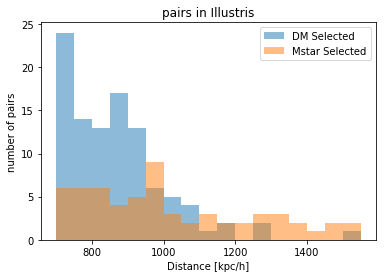

In [11]:
a = plt.hist(d_dm, bins=range(700,1600,50), label='DM Selected', alpha=0.5)
a = plt.hist(d_mstar, bins=range(700,1600,50), label='Mstar Selected', alpha=0.5)
plt.xlabel('Distance [kpc/h]')
plt.ylabel('number of pairs')
plt.title('pairs in Illustris')
plt.legend()

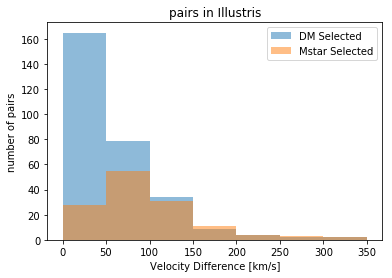

In [12]:
a = plt.hist(v_dm, bins=range(0,400,50), label='DM Selected', alpha=0.5)
a = plt.hist(v_mstar, bins=range(0,400,50), label='Mstar Selected', alpha=0.5)
plt.xlabel('Velocity Difference [km/s]')
plt.ylabel('number of pairs')
plt.title('pairs in Illustris')
plt.legend()

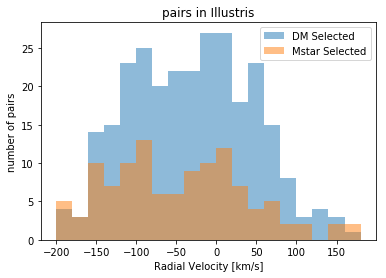

In [13]:
a = plt.hist(v_radial_dm, bins=range(-200,200,20), label='DM Selected', alpha=0.5)
a = plt.hist(v_radial_mstar, bins=range(-200,200,20), label='Mstar Selected', alpha=0.5)
plt.xlabel('Radial Velocity [km/s]')
plt.ylabel('number of pairs')
plt.title('pairs in Illustris')
plt.legend()

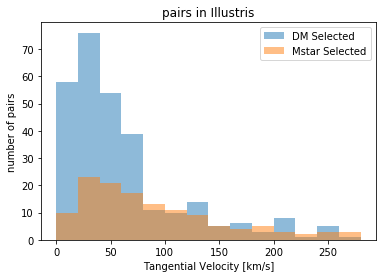

In [14]:
a = plt.hist(v_tan_dm, bins=range(0,300,20), label='DM Selected', alpha=0.5)
a = plt.hist(v_tan_mstar, bins=range(0,300,20), label='Mstar Selected', alpha=0.5)
plt.xlabel('Tangential Velocity [km/s]')
plt.ylabel('number of pairs')
plt.title('pairs in Illustris')
plt.legend()

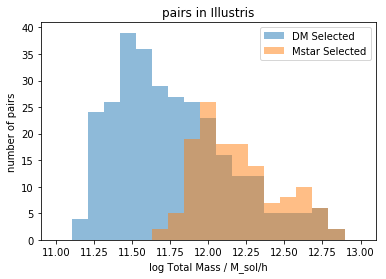

In [15]:
a = plt.hist(np.log10(t_dm*1E10), bins=np.linspace(11,13,20), label='DM Selected', alpha=0.5)
a = plt.hist(np.log10(t_mstar*1E10), bins=np.linspace(11,13,20), label='Mstar Selected', alpha=0.5)
plt.xlabel('log Total Mass / M_sol/h')
plt.ylabel('number of pairs')
plt.title('pairs in Illustris')
plt.legend()

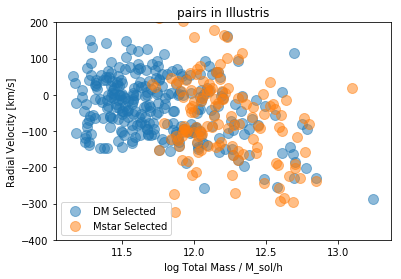

In [16]:
plt.scatter(np.log10(t_dm*1E10), v_radial_dm, label='DM Selected', s=100, alpha=0.5)
plt.scatter(np.log10(t_mstar*1E10), v_radial_mstar, label='Mstar Selected', s=100, alpha=0.5)
plt.ylim([-400,200])
plt.xlabel('log Total Mass / M_sol/h')
plt.ylabel('Radial Velocity [km/s]')
plt.title('pairs in Illustris')
plt.legend()

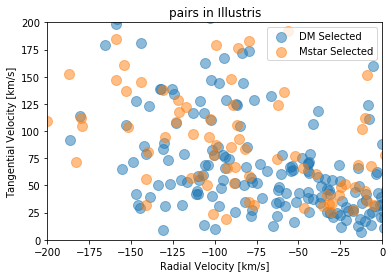

In [17]:
plt.scatter(v_radial_dm, v_tan_dm, label='DM Selected', s=100, alpha=0.5)
plt.scatter(v_radial_mstar, v_tan_mstar, label='Mstar Selected', s=100, alpha=0.5)
plt.xlim([-200,0])
plt.ylim([0,200])
plt.xlabel('Radial Velocity [km/s]')
plt.ylabel('Tangential Velocity [km/s]')
plt.title('pairs in Illustris')
plt.legend()

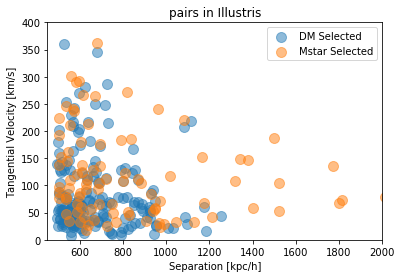

In [18]:
plt.scatter(d_dm[v_radial_dm<0], v_tan_dm[v_radial_dm<0], label='DM Selected', s=100, alpha=0.5)
plt.scatter(d_mstar[v_radial_mstar<0], v_tan_mstar[v_radial_mstar<0], label='Mstar Selected', s=100, alpha=0.5)
plt.xlim([450.0,2000])
plt.ylim([0,400])
plt.xlabel('Separation [kpc/h]')
plt.ylabel('Tangential Velocity [km/s]')
plt.title('pairs in Illustris')
plt.legend()

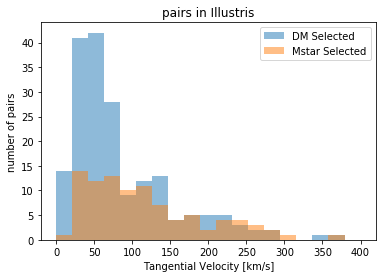

In [19]:
a = plt.hist(v_tan_dm[v_radial_dm<0], bins=np.linspace(0,400,20), label='DM Selected', alpha=0.5)
a = plt.hist(v_tan_mstar[v_radial_mstar<0], bins=np.linspace(0,400,20), label='Mstar Selected', alpha=0.5)
plt.xlabel('Tangential Velocity [km/s]')
plt.ylabel('number of pairs')
plt.title('pairs in Illustris')
plt.legend()

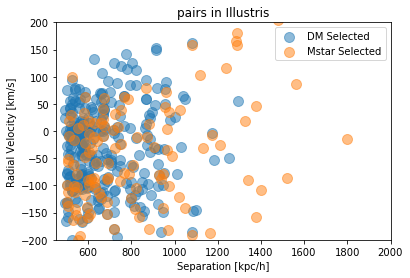

In [20]:
plt.scatter(d_dm, v_radial_dm, label='DM Selected', s=100, alpha=0.5)
plt.scatter(d_mstar, v_radial_mstar, label='Mstar Selected', s=100, alpha=0.5)
plt.xlim([450.0,2000])
plt.ylim([-200,200])
plt.xlabel('Separation [kpc/h]')
plt.ylabel('Radial Velocity [km/s]')
plt.title('pairs in Illustris')
plt.legend()

107 32


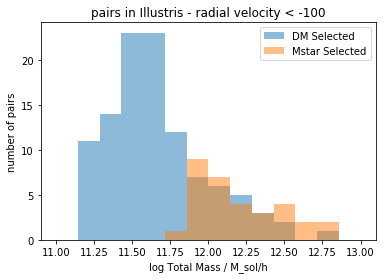

In [24]:
selection_dm = (v_radial_dm < -0.0) & (v_radial_dm > -120) & (v_tan_dm<80.0)
selection_mstar = (v_radial_mstar < -0.0) & (v_radial_mstar > -120) & (v_tan_mstar<80.0)
a = plt.hist(np.log10(t_dm[selection_dm]*1E10), bins=np.linspace(11,13,15), label='DM Selected', alpha=0.5)
a = plt.hist(np.log10(t_mstar[selection_mstar]*1E10), bins=np.linspace(11,13,15), label='Mstar Selected', alpha=0.5)
plt.xlabel('log Total Mass / M_sol/h')
plt.ylabel('number of pairs')
plt.title('pairs in Illustris - radial velocity < -100')
plt.legend()
print(np.count_nonzero(selection_dm), np.count_nonzero(t_mstar[selection_mstar]))

In [25]:
print(d_mstar[selection_mstar].min(), d_mstar[selection_mstar].max())

505.182429571 1800.41087029


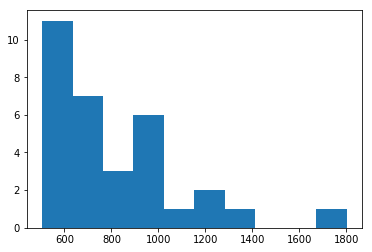

In [26]:
a = plt.hist(d_mstar[selection_mstar])